#**Natural Language Processing applied to the songs lyrics**

This notebook tries to use NLP with the lyrics of the songs that were extracted in the previous notebook. As it can be seen, this part of the project is divided into different sections. We will start extracting the lyrics of the songs by using web scrapping. Then, we will use some techniques involving NLP so that the main words per topic are extracted, with the aim of determining if different words characterize the moods that our playlists are labeled as. In order to achieve the latter, we first use a simple appproach, such as word frequency in the songs, and then we move on to the use of more complex techniques, like topic modeling, in particular LDA, to extract the most relevant words of each mood. Note that to achieve it, 8 different topic models are built with only 1 topic per model, each one being fed with songs of a mood in particular. Finally, all the songs with different moods are mixed and a single LDA model is built. Our goal is to build a recommender system based on the percentage of topics of the previous model. It is tested and the results are presented at the end.


##  **Extracting the lyrics --> Local execution**




Note that this section of the notebook needs to be run locally. We faced several issues regarding the use of web scrapping techniques in the genius web page, which is the one that is used to extract the lyrics. We first tried using Beautiful Soup, but it was not possible. Therefore, we ended up using Selenium. Note that it is run locally, because otherwise gennius thinks we are a robot.

In [ ]:
# In order to use Selenium, we first need to install these packages
!apt update
!apt install chromium-chromedriver
!pip install selenium

"apt" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"apt" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Select the correct arguments for the web driver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36")

driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)

Once we have all the options for our search implemented, we will define 3 functions that will be useful for the lyrics extraction process. 

*   **Extract_song**. Among all the information that selenium outputs, this function selects only the text corresponding with the lyrics of the song.

*   **Clean_lyrics**. This function removes those elements that are not informative, like commas or line breaks.

*   **Extract_song**. This function iterates through all the rows of a dataframe, which correspond to songs, and extracts the whole html document, which is cleaned with the auxiliaries functions. 



In [ ]:
def extract_song(lyrics):
  """
  Input: html document (text)
  Output: fragment of html corresponding with the song (text)

  This function obtains the part within a text that contains
  the lyrics of the song. We realized that all html genous documents
  follow the same structure. Therefore, we checked the previous and 
  next words of the lyrics, and used them to find the lyrics.
  """
  pattern = '[0-9]'
  start = lyrics.find("View All Credits")
  end = lyrics.find("Embed\nAbout")
  short = lyrics[start + len("View All Credits") + 5: (end)]
  without_digits = re.sub(pattern, '', short)
  return without_digits

In [ ]:
def clean_lyrics(lyrics):
  '''
  Input: lyrics of a song (text)
  Output: cleaned lyrics of a song (text)

  This function cleans a given text, by removing line
  breaks, commas, or apostrophes.
  '''
  new_lyrics = re.sub("[\(\[].*?[\)\]]", "", lyrics) 
  new_lyrics  = new_lyrics.replace('\n', ' ') 
  new_lyrics  = new_lyrics.replace("'", ' ').replace(',', ' ')
  return new_lyrics

In [ ]:
def extract_lyrics(df):
  """
  Input: dataframe of songs, containing genius URL of their lyrics (dataframe)
  Output: list containing the songs' lyrics (list)

  This function uses the column of the urls in genius of the songs within the given df,
  and with selenium the respective HTML document is extracted. The cleaning functions 
  are used to finally output a list of correct lyrics.
  """

  lyrics_songs = []
  urls = df.lyrics_url.tolist()
  for i in range(len(urls)):
    url = urls[i]
    if url != '[]':
      driver.get(url)
      results = driver.find_element(By.XPATH, "html")
      lyrics = extract_song(results.text)
      cleaned_lyrics = clean_lyrics(lyrics)
      lyrics_songs.append(cleaned_lyrics)
    
    else:
      lyrics_songs.append([])
  
  return lyrics_songs

Now that we have built all the needed functions, we use them to obtain the dataframes of each mood, with the songs of the playlists labeled as the respective mood. Each dataframe also contains a new column, **Lyrics**, which is the result of the use of Selenium in genius.

### **1. Sad songs**

In [ ]:
# We first need to read all the datasets containing sad playlists, and concatenate them
# to create the sad dataframe.
alone_ = pd.read_csv('df_Alone Again.csv', sep = ',')
calm = pd.read_csv('df_Calm Before the Storm.csv', sep = ',')
life_sucks = pd.read_csv('df_Life Sucks.csv', sep = ',')
canciones_tristes = pd.read_csv('df_canciones tristes.csv', sep = ',')

sad_df = pd.concat([alone_, calm, life_sucks, canciones_tristes])

In [ ]:
# Then, the new column containing the lyrics of the songs is extracted, and the newly created 
# dataframe is stored.
sad_df['Lyrics'] = extract_lyrics(sad_df)
sad_df.to_csv('C:/Users/sofia/OneDrive/Documentos/carrera/4 carrera/Web analytics/Final Project/ines/sad_df.csv')

### **2. Chill songs**

In [ ]:
# We first need to read all the datasets containing chill playlists, and concatenate them
# to create the sad dataframe.

chill_tracks = pd.read_csv('df_Chill Tracks.csv', sep = ',')
chill_vibes2022 = pd.read_csv('df_Chill Vibes 2022.csv', sep = ',')
relax_chill_2022 = pd.read_csv('df_Relax & Chill 2022.csv', sep = ',')
temazos_chill = pd.read_csv('df_temazos chill.csv', sep = ',')
relax_en_casa = pd.read_csv('df_Relax en casa.csv', sep = ',')

chill_df = pd.concat([chill_tracks, chill_vibes2022, relax_chill_2022, temazos_chill, relax_en_casa])

In [ ]:
# Then, the new column containing the lyrics of the songs is extracted, and the newly created 
# dataframe is stored.
chill_df['Lyrics'] = extract_lyrics(chill_df)
chill_df.to_csv('C:/Users/sofia/OneDrive/Documentos/carrera/4 carrera/Web analytics/Final Project/ines/chill_df.csv')

### **3. Dark songs**

In [ ]:
# We first need to read all the datasets containing dark playlists, and concatenate them
# to create the sad dataframe.

dark_stormy = pd.read_csv('df_Dark & Stormy.csv', sep = ',')
darkside_mix = pd.read_csv('df_Darkside Mix.csv', sep = ',')
deep_dark_indie = pd.read_csv('df_Deep Dark Indie.csv', sep = ',')
gris = pd.read_csv('df_gris.csv', sep = ',')
spooky = pd.read_csv('df_Spooky.csv', sep = ',')
villain_mode = pd.read_csv('df_Villain Mode.csv', sep = ',')

dark_df = pd.concat([dark_stormy, darkside_mix, deep_dark_indie, gris,
                      spooky, villain_mode])

In [ ]:
# Then, the new column containing the lyrics of the songs is extracted, and the newly created 
# dataframe is stored.
dark_df['Lyrics'] = extract_lyrics(dark_df)
dark_df.to_csv('C:/Users/sofia/OneDrive/Documentos/carrera/4 carrera/Web analytics/Final Project/dark_df.csv')

### **4. Sport songs**

In [ ]:
# We first need to read all the datasets containing sport playlists, and concatenate them
# to create the sad dataframe.

gym_tonic = pd.read_csv('df_Gym Tonic.csv', sep = ',')
maldita_hamburguesa = pd.read_csv('df_Maldita Hamburguesa.csv', sep = ',')
pura_energia = pd.read_csv('df_Pura energía.csv', sep = ',')
sport_motivation = pd.read_csv('df_Sport Motivation 2022.csv', sep = ',')
top_hits_workout = pd.read_csv('df_Top Hits Workout.csv', sep = ',')
workout_hits = pd.read_csv('df_Workout Hits.csv', sep = ',')

sport_df = pd.concat([gym_tonic, maldita_hamburguesa, pura_energia, 
                      sport_motivation, top_hits_workout, workout_hits])

In [ ]:
# Then, the new column containing the lyrics of the songs is extracted, and the newly created 
# dataframe is stored.
sport_df['Lyrics'] = extract_lyrics(sport_df)
sport_df.to_csv('C:/Users/sofia/OneDrive/Documentos/carrera/4 carrera/Web analytics/Final Project/sport_df.csv')

### **5. Romance songs**

In [ ]:
# We first need to read all the datasets containing romance playlists, and concatenate them
# to create the sad dataframe.

classical_romance = pd.read_csv('df_Classical Romance.csv', sep = ',')
hits_romanticos = pd.read_csv('df_Hits Románticos.csv', sep = ',')
romance_playlsit = pd.read_csv('df_Romance Playlist.csv', sep = ',')
romanticas_2022 = pd.read_csv('df_ROMANTICAS 2022 (Canciones romanticas).csv', sep = ',')
the_most_romantic = pd.read_csv('df_The Most Romantic Songs in the World.csv', sep = ',')
you_me = pd.read_csv('df_You & Me.csv', sep = ',')

romance_df = pd.concat([classical_romance, hits_romanticos, romance_playlsit, 
                        romanticas_2022, the_most_romantic, you_me])

In [ ]:
# Then, the new column containing the lyrics of the songs is extracted, and the newly created 
# dataframe is stored.
romance_df['Lyrics'] = extract_lyrics(romance_df)
romance_df.to_csv('C:/Users/sofia/OneDrive/Documentos/carrera/4 carrera/Web analytics/Final Project/romance_df.csv')

### **6. Happy songs**

In [ ]:
# We first need to read all the datasets containing happy playlists, and concatenate them
# to create the sad dataframe.

feeling_good = pd.read_csv("df_Feelin' Good.csv", sep = ',')
good_vibes = pd.read_csv('df_Good Vibes.csv', sep = ',')
happy_beats = pd.read_csv('df_Happy Beats.csv', sep = ',')
happy_favourites = pd.read_csv('df_Happy Favorites.csv', sep = ',')
happy_hits = pd.read_csv('df_Happy Hits!.csv', sep = ',')
hits_alegres = pd.read_csv('df_Hits Alegres.csv', sep = ',')
positive_vibes = pd.read_csv('df_Positive Vibes.csv', sep = ',')

happy_df = pd.concat([feeling_good, good_vibes, happy_beats, happy_favourites,
                      happy_hits, hits_alegres, positive_vibes])

In [ ]:
# Then, the new column containing the lyrics of the songs is extracted, and the newly created 
# dataframe is stored.
happy_df['Lyrics'] = extract_lyrics(happy_df)
happy_df.to_csv('C:/Users/sofia/OneDrive/Documentos/carrera/4 carrera/Web analytics/Final Project/happy_df.csv')

### **7. Revive songs**

In [ ]:
# We first need to read all the datasets containing revive playlists, and concatenate them
# to create the sad dataframe.

cheer_up = pd.read_csv("df_Cheer Up Hits.csv", sep = ',')
energy_booster_dance = pd.read_csv('df_Energy Booster_ Dance.csv', sep = ',')
energy_booster_rock = pd.read_csv('df_Energy Booster_ Rock.csv', sep = ',')
fuera_estres = pd.read_csv('df_Fuera estrés.csv', sep = ',')
mood_booster_2022 = pd.read_csv('df_Mood Booster 2022 Positive Vibes, Happy Music.csv', sep = ',')
mood_booster = pd.read_csv('df_Mood Booster.csv', sep = ',')

revive_df = pd.concat([cheer_up, energy_booster_dance, energy_booster_rock, 
                       fuera_estres, mood_booster_2022, mood_booster])

In [ ]:
# Then, the new column containing the lyrics of the songs is extracted, and the newly created 
# dataframe is stored.
revive_df['Lyrics'] = extract_lyrics(revive_df)
revive_df.to_csv('C:/Users/sofia/OneDrive/Documentos/carrera/4 carrera/Web analytics/Final Project/revive_df.csv')

### **8. Disconnecting songs**

In [ ]:
# We first need to read all the datasets containing disconnecting playlists, and concatenate them
# to create the sad dataframe.

brain_food = pd.read_csv("df_Brain Food.csv", sep = ',')
disconnect_yourself = pd.read_csv('df_Disconnect yourself.csv', sep = ',')
disconnect = pd.read_csv('df_Disconnect.csv', sep = ',')
disconnected = pd.read_csv('df_Disconnected.csv', sep = ',')
study_lofi = pd.read_csv('df_Study lofi.csv', sep = ',')

disconnect_df = pd.concat([brain_food, disconnect_yourself,disconnect, 
                           disconnected, study_lofi])

In [ ]:
# Then, the new column containing the lyrics of the songs is extracted, and the newly created 
# dataframe is stored.
disconnect_df['Lyrics'] = extract_lyrics(disconnect_df)
disconnect_df.to_csv('C:/Users/sofia/OneDrive/Documentos/carrera/4 carrera/Web analytics/Final Project/disconnect_df.csv')

## **Extract main words of each mood with NLP --> remote execution** 

This section tries to determine which are the key words in the songs of each mood, so we will keep working with the songs grouped by mood, that is, with 8 different datasets. In order to achieve the latter, we follow simple text processing steps:


1.   Keep only those songs whose lyrics are in English.
2.   Keep only alphanumeric elements and write them in lowercase.
3. Apply our **normalize_Spacy** function to convert the words into tokens, after removing those that are not informative, like "yeah".
4. Finally, we extract the key words per topic, which are the most frequent ones within the lyrics of the songs.

Once we defined the **extract_popular_words** function, we will apply it to each of the dataframes of the moods.


In [ ]:
# We first need to install and import some libraries
!pip install langdetect

from langdetect import detect
import spacy
import nltk
import pandas as pd
import numpy as np
import spacy.cli
from wordcloud import WordCloud  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gensim 
from gensim.models import TfidfModel  
from gensim.matutils import corpus2dense, corpus2csc
from gensim.matutils import corpus2dense
from gensim.matutils import hellinger

!pip install spacy
!pip install langdetect

spacy.cli.download("en_core_web_lg")
# We load the English model
nlp = spacy.load('en_core_web_lg')

nltk.download('words')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
# This is the function that we created to obtain the tokens of the words. Then, the lemma
# of the latter is kept, if and only if it is not contained in the words to remove list,
# and it is an alphanumeric term.

def normalize_Spacy(text, wordsToRemove):
      text2 = nlp(text)
      normalized_text = [w.lemma_.lower() for w in text2 
                         if not w.is_stop 
                         and w.lemma_.lower() not in wordsToRemove 
                         and not w.is_punct 
                         and (w.is_alpha or w.is_digit)]
      return normalized_text

In [ ]:
def extract_popular_words(df):
  """
  Input: dataframe whose lyrics column is not cleaned (dataframe)
  Output: None

  This function extracts plots and statistics of the most
  important wods of the songs of a dataframe. 
  """
  # Detecting language of songs --> We want to keep only English songs
  idxs_lang = []
  for idx in range(len(df)):
    if df.loc[idx, 'Lyrics'] not in [[], '[]']:

      # Removing non-english words
      words = set(nltk.corpus.words.words())
      sent = df.loc[idx, 'Lyrics'] 
      df.loc[idx, 'Lyrics'] = " ".join(w for w in nltk.wordpunct_tokenize(sent) \
                                            if w.lower() in words or not w.isalpha())
      
      if detect(df.loc[idx, 'Lyrics']) != 'en':
        idxs_lang.append(idx)
      
    else:
      idxs_lang.append(idx)
      #if df.loc[idx, 'Lyrics'] in [[], '[]']:
        
      
  ## REMOVING THE DOCS BECAUSE OF THE LANGUAGE
  print("We will remove {} songs because they are not in English".format(len(idxs_lang)))
  df.drop(idxs_lang, inplace=True)
  df = df.reset_index(drop=True)

  ## We add the words we do not want to be part of the corpus, as part of the corpus normalization.
  wordsToRemove = ["oh", "e", "ma", "t", "s", "m", "yeah", "da", "de", "d", "ve", "y", "o", "don", "lyric", "la", "yo", "que", "miller", "mike",
                   "na", "ko", "lewis", "ben", "pon", "se", "pa", "ay", "ba", "hip", "hop", "el", "mi", "con", "un", "al", "lo", "tu", "dap", 
                   "te", "dub", "ich", "ta", "es", "like", "know", "feat", "love"] #not informative words  
  corpus = []

  for idx in df.index: # it might take a while
    corpus.append(normalize_Spacy(df.loc[idx, 'Lyrics'], wordsToRemove))
  
  tokens_corpus = [token for doc in corpus for token in doc]
  counts  = nltk.FreqDist(tokens_corpus) # The frequency of the usage of each word defines it importance within the mood 
  print("These are the most common words in the quotes: ", counts.most_common(20))

  vocab   = len(counts.keys()) 
  words   = sum(counts.values())
  lexdiv  = float(words) / float(vocab)

  print("The corpus has %i unique words and a total of %i words with a lexical diversity of %0.3f" % (vocab, words, lexdiv))
  counts.plot(40, cumulative=False)

  print("Generating the WordCloud with the key words for the mood {}...".format(df['mood'].iloc[1]))
  # Create and generate a word cloud image:
  wordcloud = WordCloud(max_font_size=50, max_words=40, background_color="white").generate(' '.join(tokens_corpus))

  # Display the generated image:
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


### **1. Sad mood**

We will remove 76 songs because they are not in English
These are the most common words in the quotes:  [('cause', 315), ('let', 273), ('time', 265), ('tell', 244), ('think', 222), ('leave', 198), ('baby', 196), ('want', 196), ('good', 181), ('heart', 180), ('day', 176), ('get', 167), ('feel', 167), ('k', 160), ('night', 160), ('come', 157), ('way', 150), ('fall', 136), ('say', 136), ('need', 134)]
The corpus has 3305 unique words and a total of 24932 words with a lexical diversity of 7.544


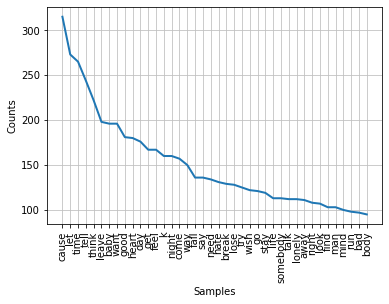

Generating the WordCloud with the key words for the mood sad...


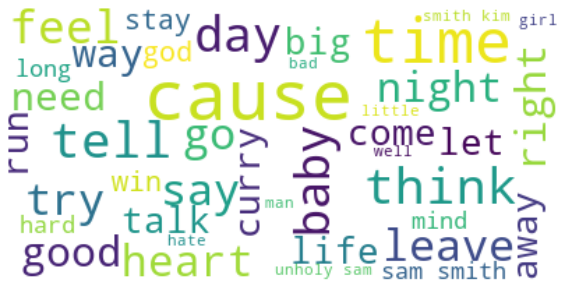

In [ ]:
sad_df = pd.read_csv('sad_df.csv')
extract_popular_words(sad_df)

### **2. Chill mood**

We will remove 155 songs because they are not in English
These are the most common words in the quotes:  [('get', 418), ('time', 398), ('let', 312), ('come', 292), ('say', 283), ('way', 275), ('go', 269), ('feel', 263), ('man', 250), ('cause', 222), ('need', 217), ('good', 211), ('tell', 205), ('want', 203), ('day', 201), ('leave', 182), ('find', 181), ('think', 180), ('night', 175), ('people', 168)]
The corpus has 6227 unique words and a total of 38718 words with a lexical diversity of 6.218


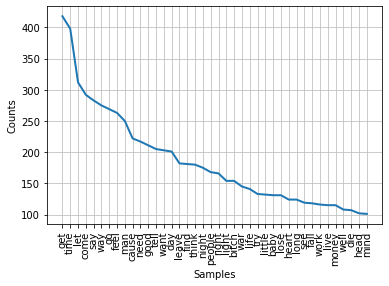

Generating the WordCloud with the key words for the mood chill...


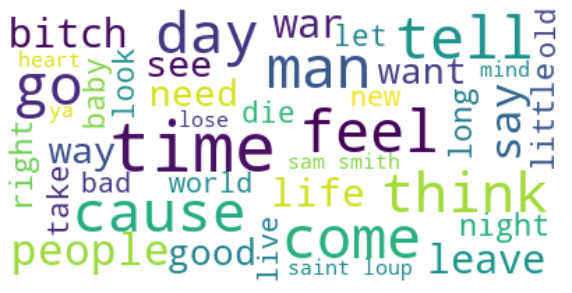

In [ ]:
chill_df = pd.read_csv('chill_df.csv')
extract_popular_words(chill_df)

### **3. Dark mood**

We will remove 115 songs because they are not in English
These are the most common words in the quotes:  [('get', 416), ('come', 400), ('feel', 357), ('time', 347), ('cause', 290), ('k', 278), ('tell', 256), ('want', 250), ('think', 250), ('need', 242), ('life', 224), ('leave', 221), ('let', 220), ('heart', 215), ('away', 209), ('dark', 206), ('way', 195), ('run', 191), ('day', 190), ('go', 185)]
The corpus has 3557 unique words and a total of 33208 words with a lexical diversity of 9.336


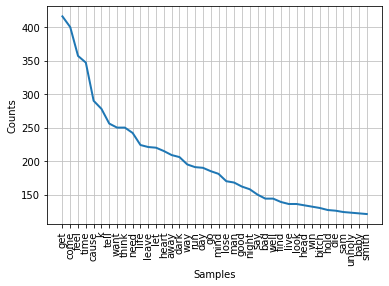

Generating the WordCloud with the key words for the mood dark...


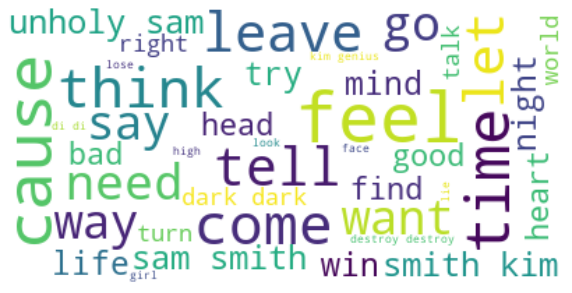

In [ ]:
dark_df = pd.read_csv('dark_df.csv')
extract_popular_words(dark_df)

### **4. Sport mood**

We will remove 139 songs because they are not in English
These are the most common words in the quotes:  [('get', 665), ('let', 565), ('feel', 509), ('baby', 471), ('come', 436), ('cause', 409), ('time', 407), ('want', 400), ('good', 380), ('night', 374), ('need', 337), ('tell', 332), ('day', 317), ('run', 311), ('way', 298), ('life', 296), ('right', 267), ('go', 256), ('money', 244), ('think', 243)]
The corpus has 4618 unique words and a total of 43609 words with a lexical diversity of 9.443


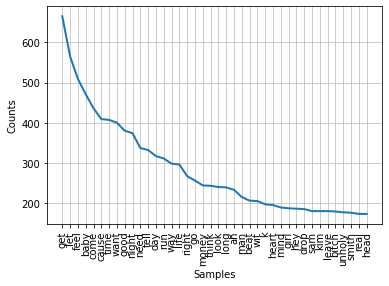

Generating the WordCloud with the key words for the mood sport...


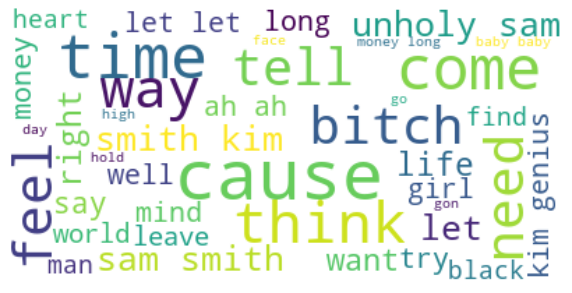

In [ ]:
sport_df = pd.read_csv('sport_df.csv')
extract_popular_words(sport_df)

### **5. Romance mood**

We will remove 203 songs because they are not in English
These are the most common words in the quotes:  [('baby', 261), ('come', 235), ('want', 198), ('time', 187), ('cause', 174), ('way', 171), ('heart', 170), ('get', 163), ('need', 154), ('let', 153), ('life', 132), ('think', 126), ('find', 121), ('feel', 112), ('look', 108), ('well', 107), ('night', 106), ('fall', 103), ('girl', 102), ('day', 100)]
The corpus has 2691 unique words and a total of 16877 words with a lexical diversity of 6.272


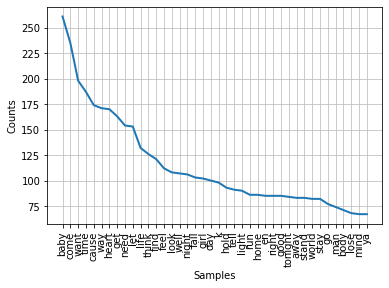

Generating the WordCloud with the key words for the mood romance...


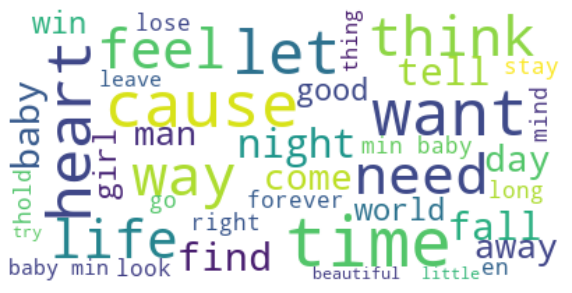

In [ ]:
romance_df = pd.read_csv('romance_df.csv')
extract_popular_words(romance_df)

### **6. Happy mood**

We will remove 129 songs because they are not in English
These are the most common words in the quotes:  [('baby', 971), ('get', 851), ('let', 753), ('feel', 625), ('want', 604), ('cause', 600), ('night', 589), ('come', 589), ('way', 570), ('time', 535), ('good', 484), ('day', 457), ('need', 432), ('right', 398), ('girl', 391), ('life', 387), ('tell', 375), ('tonight', 331), ('think', 329), ('look', 308)]
The corpus has 3820 unique words and a total of 51139 words with a lexical diversity of 13.387


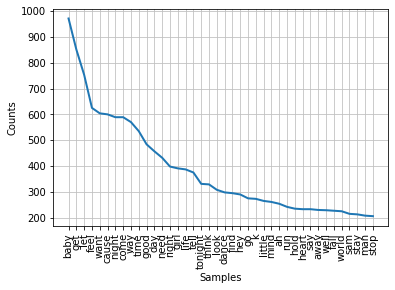

Generating the WordCloud with the key words for the mood happy...


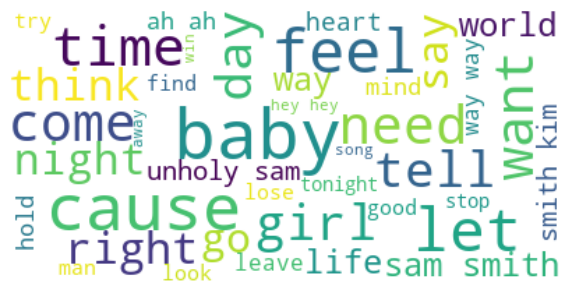

In [ ]:
happy_df = pd.read_csv('happy_df.csv', sep = ';', on_bad_lines='skip')
extract_popular_words(happy_df)

### **7. Revive mood**

We will remove 128 songs because they are not in English
These are the most common words in the quotes:  [('come', 1092), ('time', 1008), ('feel', 897), ('go', 843), ('day', 815), ('say', 765), ('little', 733), ('think', 714), ('life', 675), ('tell', 669), ('find', 639), ('way', 628), ('good', 613), ('man', 611), ('get', 604), ('leave', 569), ('let', 546), ('long', 540), ('look', 511), ('cause', 506)]
The corpus has 8679 unique words and a total of 123451 words with a lexical diversity of 14.224


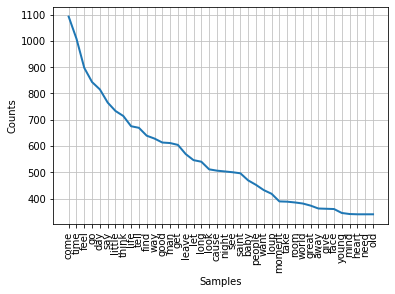

Generating the WordCloud with the key words for the mood revive...


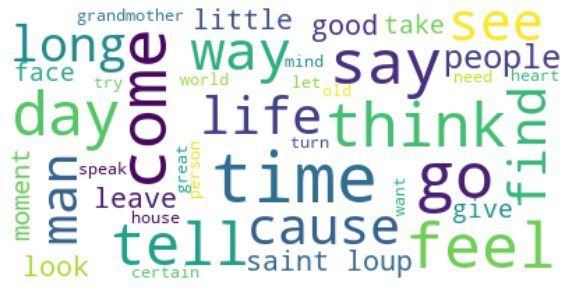

In [ ]:
revive_df = pd.read_csv('revive_df.csv')
extract_popular_words(revive_df)

### **8. Disconnect mood**

We will remove 52 songs because they are not in English
These are the most common words in the quotes:  [('get', 450), ('di', 422), ('come', 390), ('man', 323), ('let', 298), ('baby', 294), ('tell', 285), ('right', 272), ('cause', 268), ('want', 258), ('time', 231), ('way', 223), ('good', 217), ('girl', 212), ('work', 210), ('feel', 200), ('boom', 194), ('dance', 184), ('boy', 174), ('night', 161)]
The corpus has 4388 unique words and a total of 35127 words with a lexical diversity of 8.005


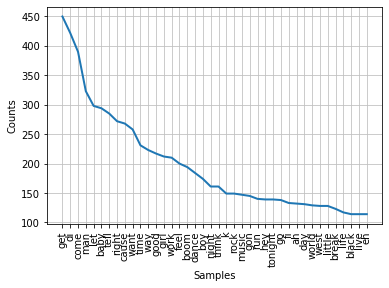

Generating the WordCloud with the key words for the mood disconnecting...


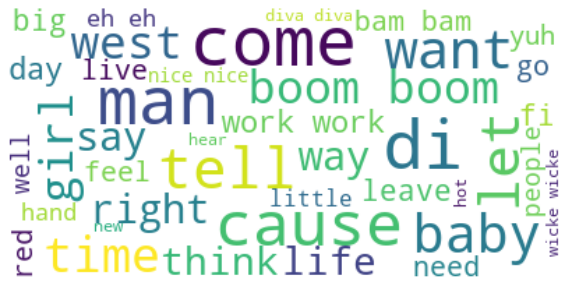

In [ ]:
disconnect_df = pd.read_csv('disconnect_df.csv')
extract_popular_words(disconnect_df)

## **Introducing topic modeling**

This third section tries, as the previous one did, to extract the key words that characterize each mood. Nonetheless, we try to obtain them by using Topic modeling. The latter is an unsupervised machine learning approach that can scan a series of documents, in this case song lyrics, find word and phrase patterns within them, and automatically cluster word groupings and related expressions that best represent the set. Therefore, we use the datasets of moods created in the first section, and apply the created **extract_topic** function to each of them. That function implements topic modeling to the input dataset with just 1 topic by using LDA, and finally the most representative words of that topic are plotted. Note that the aim of LDA is to find topics a document belongs to, based on the words in it. Once we defined the **extract_topic** function, we will apply it to each of the dataframes of the moods.

In [ ]:
# In order to work with Mallet (LDA) we first need to downgrade the gensim's version
!pip install --upgrade gensim==3.8.3

In [ ]:
# Also needed for LDA
import os       #importing os to set environment variable
def install_java():
    !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
    os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
    !java -version       #check java version
install_java()

openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


In [ ]:
%%capture

!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [ ]:
os.environ['MALLET_HOME'] = 'mallet-2.0.8'
mallet_path = 'mallet-2.0.8/bin/mallet' # you should NOT need to change this 

In [ ]:
def extract_topic(df, total_topics):
  """
  Input: 
    - df: dataset of a particular mood
    - total_topics: number of topics that the LDA model will contain
  
  Output:
    -lda_model: topic model
    - corpus_bow: Bag of words of the lyrics

  This function does all the natural language preprocessing that we explained 
  above, and finally builds a topic model with the respective number of topics.
  """
  import matplotlib.pyplot as plt
  idxs_lang = []

  for idx in range(len(df)):
    if df.loc[idx, 'Lyrics'] not in [[], '[]']:

      # Removing non-english words
      words = set(nltk.corpus.words.words())
      sent = df.loc[idx, 'Lyrics'] 
      df.loc[idx, 'Lyrics'] = " ".join(w for w in nltk.wordpunct_tokenize(sent) \
                                            if w.lower() in words or not w.isalpha())
      
      if detect(df.loc[idx, 'Lyrics']) != 'en':
        idxs_lang.append(idx)      
        
      if type(df.loc[idx, 'Lyrics']) == 'float':  # the url was incomplete -> 404      
        if math.isnan(df.loc[idx, 'Lyrics']):
          idxs_lang.append(idx)
    
    else:
        idxs_lang.append(idx)
      
  ## REMOVING THE DOCS BECAUSE OF THE LANGUAGE
  print("We will remove {} songs because they are not in English".format(len(idxs_lang)))
  df.drop(idxs_lang, inplace=True)
  df = df.reset_index(drop=True)

  ## We add the words we do not want to be part of the corpus, as part of the corpus normalization.

  wordsToRemove = ["oh", "e", "ma", "t", "s", "m", "yeah", "da", "de", "d", "ve", "y", "o", "don", "lyric", "la", "yo", "que", "miller", "mike",
                   "na", "ko", "lewis", "ben", "pon", "se", "pa", "ay", "ba", "hip", "hop", "el", "mi", "con", "un", "al", "lo", "tu", "dap", 
                   "te", "dub", "ich", "ta", "es", "know", "feat", "like", "love"] #not informative words  
  corpus = []
  for idx in df.index: # it might take a while
    corpus.append(normalize_Spacy(df.loc[idx, 'Lyrics'], wordsToRemove))

  tokens_corpus = [token for doc in corpus for token in doc]
  counts  = nltk.FreqDist(tokens_corpus)
  print("These are the most common words in the quotes: ", counts.most_common(20))

  vocab   = len(counts.keys()) 
  words   = sum(counts.values())
  lexdiv  = float(words) / float(vocab)

  # Create dictionary of tokens: the input is the preprocessed corpus 
  D = gensim.corpora.Dictionary(corpus) #we need to includ a list of lists (first list the document, and the second the words of the documents)
  n_tokens = len(D)

  print('The dictionary contains', n_tokens, 'terms')
  print('First terms in the dictionary:')
  for n in range(20):
      print(str(n), ':', D[n])

  plt.hist(D.dfs.values(),200)
  plt.title("Word frequency per document")
  plt.ylabel("Count")
  plt.xlabel("Words")
  plt.show()

  no_below = 3 #minimun number of documents to mantein a termn of the dictionary
  no_above = .8 #the maximum proportion of the docuemnts where the term can appear to mantein in the dictionary

  D.filter_extremes(no_below=no_below,no_above=no_above, keep_n=5000)
  n_tokens = len(D)

  print('The dictionary contains', n_tokens, 'terms')

  print('First terms in the dictionary:')
  for n in range(10):
      print(str(n), ':', D[n])

  plt.hist(D.dfs.values(),40)
  plt.title("Word frequency per document")
  plt.ylabel("Count")
  plt.xlabel("Words")
  plt.show()

  corpus_bow = [D.doc2bow(doc) for doc in corpus]
  print("corpus", corpus)
  print("Corpus_bow", corpus_bow)

  corpus_bow2 = sum(corpus_bow, []) #flatten the list (instead of list of lists with different sizes, one list of tuples)

  corpus_bow_sorted = sorted(dict(corpus_bow2).items(), key=lambda kv: kv[1], reverse=True) #sort the list to get the most representative words
  list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow_sorted[:10]]

  print(list_word_counts)
  (words, counts) = zip(*list_word_counts)
  plt.figure(figsize=(10,5))
  plt.stem(words,counts, use_line_collection = True)
  plt.title("BoW representation")
  plt.xlabel('Words')
  plt.ylabel('Counts')
  plt.show()

  # Build the LDA model
  lda_model = gensim.models.LdaMulticore(corpus_bow, num_topics=total_topics, id2word = D, passes=20) # We use BOW instead of TF-IDF!
  
  # Print 20 most probable words:
  for idx, topic in lda_model.print_topics(num_words=20):
    print("Topic: %d \nWords: %s" %(idx, topic))


  return lda_model, corpus_bow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/WebAnalytics/final/moods

/content/drive/MyDrive/Colab Notebooks/WebAnalytics/final/moods


### **1. Sad mood**

We will remove 75 songs because they are not in English
These are the most common words in the quotes:  [('cause', 315), ('let', 273), ('time', 265), ('tell', 244), ('think', 222), ('baby', 199), ('leave', 198), ('want', 196), ('good', 181), ('heart', 180), ('day', 176), ('get', 167), ('feel', 167), ('k', 160), ('night', 160), ('come', 158), ('way', 150), ('fall', 136), ('say', 136), ('need', 134)]
The dictionary contains 3321 terms
First terms in the dictionary:
0 : accomplice
1 : alibi
2 : baby
3 : bad
4 : bittersweet
5 : bloody
6 : break
7 : bury
8 : cause
9 : crime
10 : cross
11 : damage
12 : doe
13 : eyed
14 : face
15 : favorite
16 : flee
17 : hate
18 : heart
19 : honey


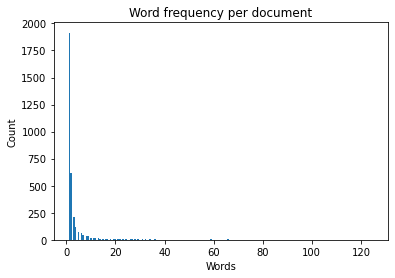

The dictionary contains 793 terms
First terms in the dictionary:
0 : baby
1 : bad
2 : bloody
3 : break
4 : bury
5 : cause
6 : crime
7 : cross
8 : damage
9 : doe


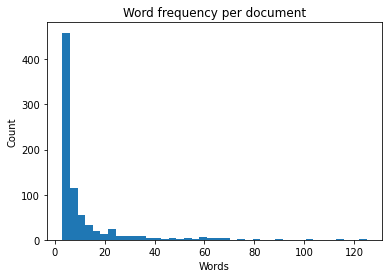

corpus [['k', 'favorite', 'crime', 'bad', 'let', 'treat', 'willing', 'accomplice', 'honey', 'watch', 'flee', 'scene', 'doe', 'eyed', 'bury', 'heart', 'break', 'bloody', 'hope', 'favorite', 'crime', 'alibi', 'cross', 'heart', 'cross', 'line', 'time', 'siren', 'cause', 'hope', 'favorite', 'crime', 'bittersweet', 'think', 'damage', 'cause', 'break', 'trouble', 'hate', 'smile', 'face', 'look', 'hope', 'favorite', 'crime', 'hope', 'ur', 'jealousy', 'jealousy', 'license', 'favorite', 'crime', 'favorite', 'crime', 'cause', 'baby'], ['k', 'dark', 'leave', 'far', 'ashamed', 'watch', 'end', 'stay', 'time', 'cause', 'stay', 'come', 'close', 'try', 'change', 'mind', 'cruel', 'kind', 'dark', 'apart', 'space', 'baby', 'ah', 'give', 'live', 'underestimate', 'doubt', 'want', 'carry', 'fine', 'long', 'ignore', 'fight', 'fall', 'apart', 'face', 'break', 'heart', 'try', 'brave', 'stop', 'stay', 'dark', 'apart', 'space', 'baby', 'ah', 'regret', 'thing', 'word', 'say', 'mean', 'world', 'life', 'want', 'liv

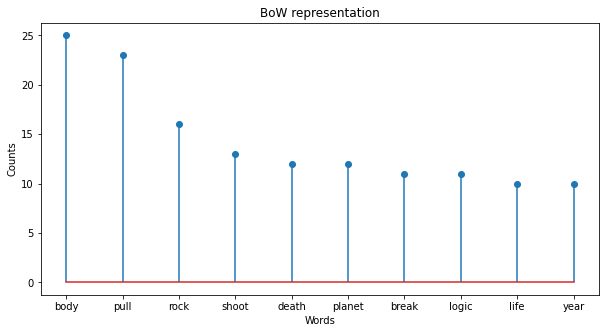

Topic: 0 
Words: 0.016*"cause" + 0.014*"let" + 0.014*"time" + 0.012*"tell" + 0.011*"think" + 0.010*"baby" + 0.010*"leave" + 0.010*"want" + 0.009*"good" + 0.009*"heart" + 0.009*"day" + 0.009*"get" + 0.009*"feel" + 0.008*"k" + 0.008*"night" + 0.008*"come" + 0.008*"way" + 0.007*"say" + 0.007*"fall" + 0.007*"need"


In [ ]:
sad_lda_model, bow_sad = extract_topic(pd.read_csv('sad_df.csv'), 1)

### **2. Chill mood**

We will remove 153 songs because they are not in English
These are the most common words in the quotes:  [('get', 418), ('time', 398), ('let', 313), ('come', 293), ('say', 284), ('way', 275), ('go', 269), ('feel', 263), ('man', 250), ('cause', 222), ('need', 217), ('good', 211), ('tell', 205), ('want', 203), ('day', 201), ('leave', 182), ('find', 181), ('think', 180), ('night', 176), ('people', 168)]
The dictionary contains 6265 terms
First terms in the dictionary:
0 : alive
1 : baby
2 : break
3 : bring
4 : cause
5 : chase
6 : cold
7 : come
8 : fake
9 : fate
10 : feel
11 : get
12 : heart
13 : home
14 : late
15 : lie
16 : maybe
17 : need
18 : night
19 : story


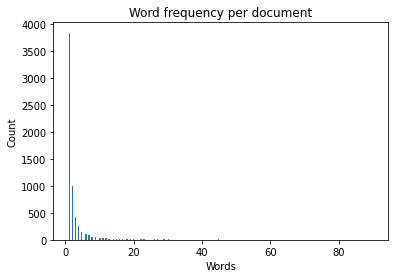

The dictionary contains 1432 terms
First terms in the dictionary:
0 : alive
1 : baby
2 : break
3 : bring
4 : cause
5 : chase
6 : cold
7 : come
8 : fake
9 : fate


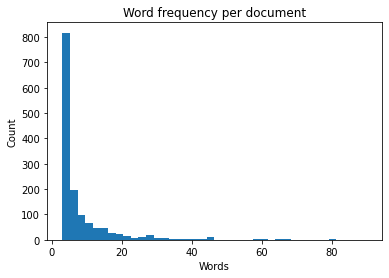

corpus [['chase', 'come', 'alive', 'try', 'chase', 'feel', 'warm', 'feel', 'weightless', 'want', 'lie', 'want', 'fake', 'get', 'cold', 'maybe', 'fate', 'cause', 'feel', 'alive', 'try', 'chase', 'get', 'late', 'need', 'story', 'night', 'story', 'night', 'feel', 'alive', 'baby', 'try', 'bring', 'home', 'feel', 'alive', 'baby', 'try', 'bring', 'home', 'come', 'alive', 'try', 'chase', 'come', 'alive', 'try', 'chase', 'feel', 'warm', 'feel', 'weightless', 'want', 'lie', 'want', 'fake', 'get', 'cold', 'maybe', 'fate', 'cause', 'feel', 'alive', 'try', 'chase', 'get', 'late', 'need', 'break', 'heart', 'story', 'night', 'story', 'night', 'feel', 'alive', 'baby', 'try', 'bring', 'home', 'feel', 'alive', 'baby', 'try', 'bring', 'home', 'come', 'alive', 'try', 'chase'], ['k', 'best', 'come', 'mind', 'lose', 'track', 'time', 'dream', 'dream', 'run', 'arm', 'sun', 'wait', 'moon', 'wait', 'day', 'good', 'good', 'good', 'good', 'heart', 'good', 'good', 'good', 'good', 'good', 'heart', 'good', 'hear', 

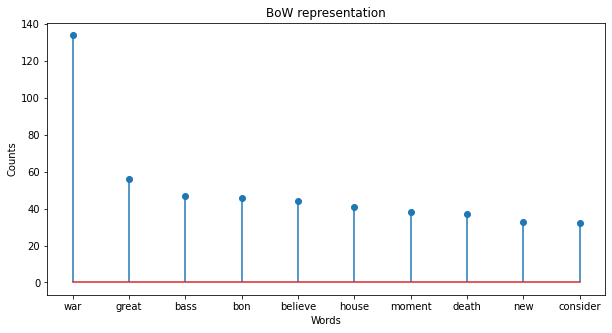

Topic: 0 
Words: 0.014*"get" + 0.013*"time" + 0.010*"let" + 0.010*"come" + 0.009*"say" + 0.009*"way" + 0.009*"go" + 0.009*"feel" + 0.008*"man" + 0.007*"cause" + 0.007*"need" + 0.007*"good" + 0.007*"tell" + 0.007*"want" + 0.007*"day" + 0.006*"leave" + 0.006*"find" + 0.006*"think" + 0.006*"night" + 0.006*"people"


In [ ]:
chill_lda_model, bow_chill = extract_topic(pd.read_csv('chill_df.csv'), 1)

### **3. Dark mood**

We will remove 114 songs because they are not in English
These are the most common words in the quotes:  [('get', 416), ('come', 400), ('feel', 357), ('time', 347), ('cause', 290), ('k', 278), ('tell', 256), ('want', 250), ('think', 250), ('need', 242), ('life', 224), ('leave', 221), ('let', 220), ('heart', 215), ('away', 209), ('dark', 206), ('way', 195), ('run', 191), ('day', 190), ('go', 185)]
The dictionary contains 3563 terms
First terms in the dictionary:
0 : ah
1 : arm
2 : baby
3 : bad
4 : ballerina
5 : beautiful
6 : beauty
7 : bloom
8 : blue
9 : boy
10 : broken
11 : celebrate
12 : deep
13 : disaster
14 : emerald
15 : emotional
16 : face
17 : far
18 : fate
19 : feel


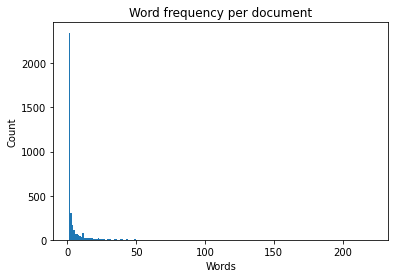

The dictionary contains 1217 terms
First terms in the dictionary:
0 : ah
1 : arm
2 : baby
3 : bad
4 : beautiful
5 : beauty
6 : blue
7 : boy
8 : broken
9 : deep


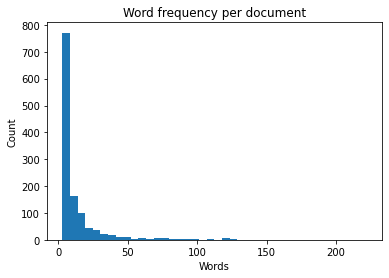

corpus [['queen', 'disaster', 'indescribable', 'get', 'sparkle', 'emerald', 'set', 'soul', 'fire', 'wild', 'deep', 'blue', 'sea', 'boy', 'feel', 'beautiful', 'arm', 'golden', 'grill', 'feel', 'way', 'get', 'ballerina', 'time', 'ya', 'king', 'baby', 'queen', 'disaster', 'disaster', 'get', 'ballerina', 'bad', 'boy', 'king', 'baby', 'queen', 'disaster', 'disaster', 'ah', 'get', 'mascara', 'thick', 'emotional', 'party', 'girl', 'hard', 'go', 'far', 'go', 'see', 'face', 'incredible', 'paint', 'soul', 'indelible', 'celebrate', 'twisted', 'fate', 'broken', 'get', 'ballerina', 'time', 'ya', 'king', 'baby', 'queen', 'disaster', 'disaster', 'get', 'ballerina', 'bad', 'boy', 'king', 'baby', 'queen', 'disaster', 'disaster', 'ah', 'get', 'ballerina', 'time', 'ya', 'king', 'baby', 'queen', 'disaster', 'disaster', 'get', 'ballerina', 'bad', 'boy', 'king', 'beauty', 'queen', 'disaster', 'disaster', 'ah', 'ah', 'bloom', 'unholy', 'sam', 'smith', 'kim', 'genius'], ['young', 'beautiful', 'see', 'world', 

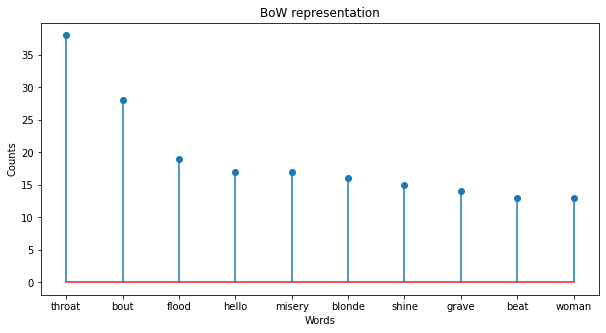

Topic: 0 
Words: 0.014*"get" + 0.014*"come" + 0.012*"feel" + 0.012*"time" + 0.010*"cause" + 0.009*"k" + 0.009*"tell" + 0.008*"think" + 0.008*"want" + 0.008*"need" + 0.008*"life" + 0.007*"leave" + 0.007*"let" + 0.007*"heart" + 0.007*"away" + 0.007*"dark" + 0.007*"way" + 0.006*"run" + 0.006*"day" + 0.006*"go"


In [ ]:
dark_lda_model, bow_dark = extract_topic(pd.read_csv("dark_df.csv"), 1)

### **4. Sport mood**

We will remove 140 songs because they are not in English
These are the most common words in the quotes:  [('get', 664), ('let', 574), ('feel', 502), ('baby', 474), ('come', 436), ('cause', 407), ('time', 401), ('want', 400), ('good', 382), ('night', 372), ('need', 344), ('tell', 332), ('run', 319), ('day', 316), ('way', 298), ('life', 296), ('right', 269), ('go', 250), ('money', 244), ('think', 242)]
The dictionary contains 4619 terms
First terms in the dictionary:
0 : affection
1 : aside
2 : baby
3 : boy
4 : control
5 : deny
6 : excited
7 : feel
8 : fine
9 : fire
10 : go
11 : good
12 : happen
13 : hide
14 : honey
15 : k
16 : kim
17 : let
18 : long
19 : look


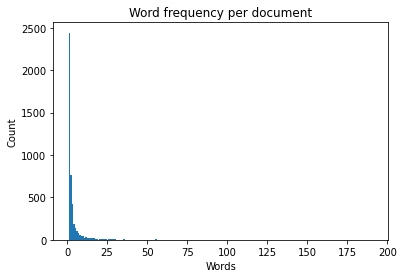

The dictionary contains 1411 terms
First terms in the dictionary:
0 : affection
1 : aside
2 : baby
3 : boy
4 : control
5 : deny
6 : excited
7 : feel
8 : fine
9 : fire


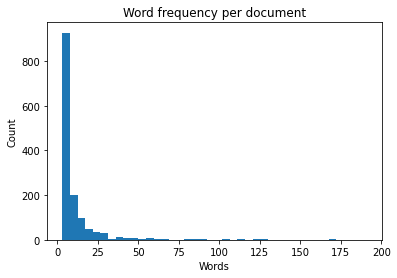

corpus [['k', 'excited', 'tonight', 'night', 'happen', 'tonight', 'aside', 'time', 'affection', 'go', 'night', 'want', 'feel', 'wrap', 'want', 'squeeze', 'real', 'slow', 'let', 'excited', 'hide', 'lose', 'control', 'think', 'excited', 'hide', 'want', 'think', 'tomorrow', 'sweet', 'long', 'long', 'time', 'good', 'time', 'baby', 'worry', 'round', 'boy', 'fine', 'let', 'excited', 'hide', 'lose', 'control', 'think', 'excited', 'hide', 'want', 'want', 'want', 'boy', 'want', 'feel', 'honey', 'wrap', 'want', 'squeeze', 'real', 'slow', 'let', 'go', 'pointer', 'fire', 'pointer', 'unholy', 'sam', 'smith', 'kim', 'excited', 'hide', 'lose', 'control', 'think', 'excited', 'hide', 'want', 'want', 'excited', 'hide', 'lose', 'control', 'think', 'excited', 'deny', 'want', 'excited', 'boy', 'ow', 'excited', 'look', 'ow', 'excited', 'ow'], ['k', 'beat', 'tell', 'come', 'face', 'well', 'disappear', 'fire', 'clear', 'beat', 'beat', 'well', 'run', 'well', 'blood', 'man', 'tough', 'well', 'beat', 'bad', 'bea

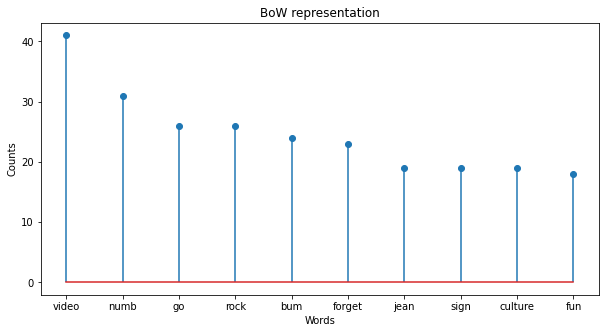

Topic: 0 
Words: 0.017*"get" + 0.015*"let" + 0.013*"feel" + 0.012*"baby" + 0.011*"come" + 0.011*"cause" + 0.010*"time" + 0.010*"want" + 0.010*"good" + 0.010*"night" + 0.009*"need" + 0.009*"tell" + 0.008*"run" + 0.008*"day" + 0.008*"way" + 0.008*"life" + 0.007*"right" + 0.007*"go" + 0.006*"money" + 0.006*"think"


In [ ]:
sport_lda_model, bow_sport = extract_topic(pd.read_csv("sport_df.csv"), 1)

### **5. Romance mood**

We will remove 202 songs because they are not in English
These are the most common words in the quotes:  [('baby', 263), ('come', 235), ('want', 198), ('time', 187), ('cause', 174), ('way', 171), ('heart', 170), ('get', 163), ('need', 154), ('let', 153), ('life', 132), ('think', 126), ('find', 121), ('feel', 112), ('look', 108), ('well', 107), ('night', 106), ('fall', 103), ('girl', 102), ('day', 100)]
The dictionary contains 2694 terms
First terms in the dictionary:
0 : instrumental
1 : song
2 : adieu
3 : admonishment
4 : adventuress
5 : agony
6 : alas
7 : amorous
8 : anatomy
9 : arrival
10 : astonishment
11 : ballad
12 : band
13 : bed
14 : beneath
15 : bid
16 : bo
17 : bold
18 : booze
19 : brand


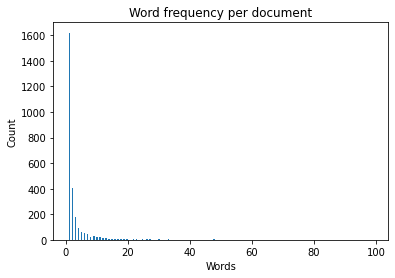

The dictionary contains 668 terms
First terms in the dictionary:
0 : instrumental
1 : song
2 : bed
3 : brand
4 : burn
5 : chance
6 : clothe
7 : come
8 : compare
9 : course


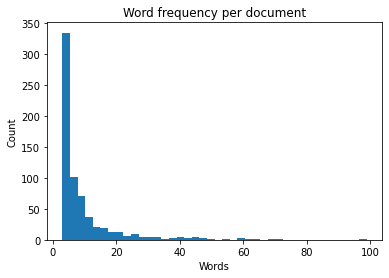

corpus [['song', 'instrumental'], ['song', 'instrumental'], ['meditation', 'time', 'wicked', 'night', 'wild', 'revelry', 'life', 'game', 'live', 'report', 'adventuress', 'courtesan', 'pride', 'nearby', 'peace', 'piety', 'society', 'dwell', 'band', 'holy', 'man', 'refuge', 'desert', 'solitude', 'earthly', 'folly', 'devote', 'holy', 'work', 'fast', 'prayer', 'monk', 'solely', 'mention', 'band', 'holy', 'man', 'famous', 'near', 'far', 'fasting', 'prayer', 'compare', 'plain', 'fancy', 'pray', 'course', 'par', 'day', 'sleep', 'heavily', 'wrest', 'devil', 'go', 'bed', 'exhaust', 'sun', 'shine', 'vision', 'style', 'brill', 'wicked', 'crowd', 'man', 'cheer', 'manner', 'rude', 'glance', 'dance', 'shimmy', 'nude', 'say', 'dream', 'fantastical', 'monastical', 'unsuppressed', 'desire', 'fear', 'find', 'monkish', 'cell', 'hat', 'view', 'girl', 'anatomy', 'save', 'soul', 'hell', 'wonder', 'winter', 'underwear', 'quickly', 'evening', 'clothe', 'toothbrush', 'vest', 'guard', 'exposure', 'throw', 'wool

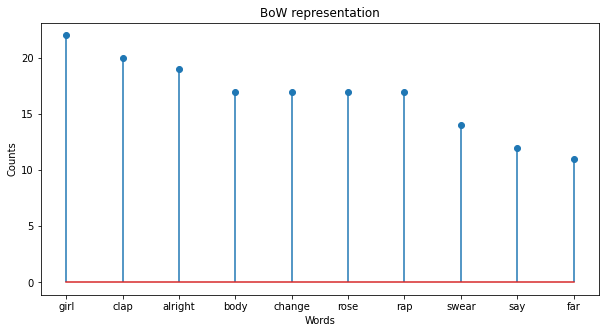

Topic: 0 
Words: 0.019*"baby" + 0.017*"come" + 0.015*"want" + 0.014*"time" + 0.013*"cause" + 0.013*"way" + 0.013*"heart" + 0.012*"get" + 0.011*"need" + 0.011*"let" + 0.010*"life" + 0.009*"think" + 0.009*"find" + 0.008*"feel" + 0.008*"look" + 0.008*"well" + 0.008*"night" + 0.008*"fall" + 0.008*"girl" + 0.007*"day"


In [ ]:
romance_lda_model, bow_romance = extract_topic(pd.read_csv("romance_df.csv"), 1)

### **6. Happy mood**

We will remove 129 songs because they are not in English
These are the most common words in the quotes:  [('baby', 971), ('get', 851), ('let', 753), ('feel', 625), ('want', 604), ('cause', 600), ('night', 589), ('come', 589), ('way', 570), ('time', 535), ('good', 484), ('day', 457), ('need', 432), ('right', 398), ('girl', 391), ('life', 387), ('tell', 375), ('tonight', 331), ('think', 329), ('look', 308)]
The dictionary contains 3820 terms
First terms in the dictionary:
0 : alright
1 : beat
2 : blame
3 : booty
4 : breath
5 : dance
6 : feel
7 : fire
8 : funk
9 : ghost
10 : give
11 : good
12 : grove
13 : happy
14 : heat
15 : let
16 : life
17 : loose
18 : mission
19 : night


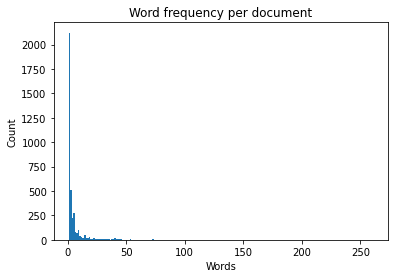

The dictionary contains 1698 terms
First terms in the dictionary:
0 : alright
1 : beat
2 : blame
3 : booty
4 : breath
5 : dance
6 : feel
7 : fire
8 : funk
9 : ghost


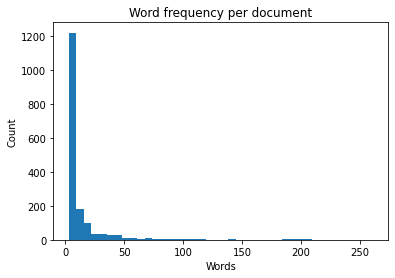

corpus [['shake', 'give', 'ya', 'blame', 'blame', 'night', 'try', 'blame', 'good', 'time', 'fire', 'blame', 'blame', 'let', 'sorrow', 'ruin', 'shake', 'give', 'ya', 'alright', 'dance', 'safe', 'ya', 'alright', 'shake', 'give', 'ya', 'alright', 'dance', 'stage', 'ya', 'alright', 'let', 'tonight', 'good', 'time', 'life', 'mission', 'happy', 'life', 'quick', 'rest', 'peace', 'shake', 'give', 'ya', 'alright', 'dance', 'safe', 'ya', 'alright', 'shake', 'give', 'ya', 'alright', 'dance', 'stage', 'ya', 'alright', 'think', 'funk', 'dance', 'want', 'booty', 'dance', 'beat', 'feel', 'grove', 'loose', 'heat', 'breath', 'ghost'], ['good', 'start', 'time', 'heart', 'away', 'knock', 'beat', 'throw', 'face', 'wide', 'open', 'arm', 'baby', 'afraid', 'protect', 'heart', 'cause', 'fall', 'shake', 'good', 'look', 'rest', 'cause', 'good', 'start', 'baby', 'come', 'cause', 'feel', 'time', 'good', 'start', 'baby', 'feel', 'rest', 'push', 'shove', 'brush', 'feel', 'want', 'win', 'write', 'face', 'stop', 'run

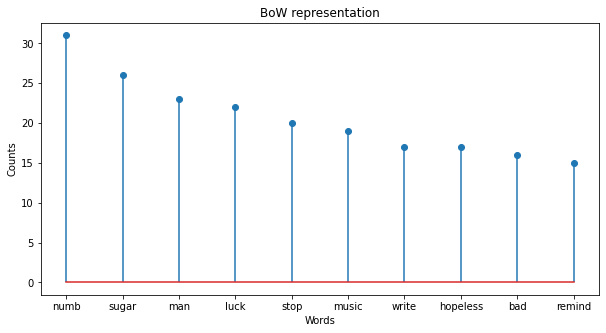

Topic: 0 
Words: 0.020*"baby" + 0.018*"get" + 0.016*"let" + 0.013*"feel" + 0.013*"want" + 0.012*"cause" + 0.012*"come" + 0.012*"night" + 0.012*"way" + 0.011*"time" + 0.010*"good" + 0.009*"day" + 0.009*"need" + 0.008*"right" + 0.008*"girl" + 0.008*"life" + 0.008*"tell" + 0.007*"tonight" + 0.007*"think" + 0.006*"look"


In [ ]:
happy_lda_model, bow_happy = extract_topic(pd.read_csv("happy_df.csv", sep=";"), 1)

### **7. Revive mood**


We will remove 129 songs because they are not in English
These are the most common words in the quotes:  [('come', 1092), ('time', 1008), ('feel', 897), ('go', 843), ('day', 815), ('say', 765), ('little', 733), ('think', 714), ('life', 675), ('tell', 669), ('find', 639), ('way', 628), ('good', 613), ('man', 611), ('get', 604), ('leave', 569), ('let', 546), ('long', 540), ('look', 511), ('cause', 506)]
The dictionary contains 8666 terms
First terms in the dictionary:
0 : bed
1 : cause
2 : cry
3 : deal
4 : fall
5 : feel
6 : flat
7 : forever
8 : good
9 : heartbreak
10 : improve
11 : leave
12 : lonely
13 : long
14 : mean
15 : midnight
16 : mind
17 : person
18 : rid
19 : sleep


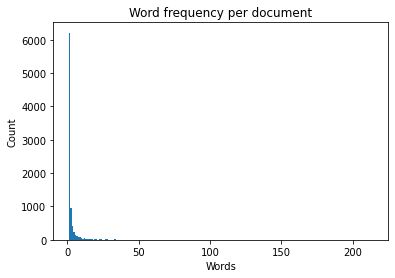

The dictionary contains 2452 terms
First terms in the dictionary:
0 : bed
1 : cause
2 : cry
3 : deal
4 : fall
5 : feel
6 : flat
7 : forever
8 : good
9 : heartbreak


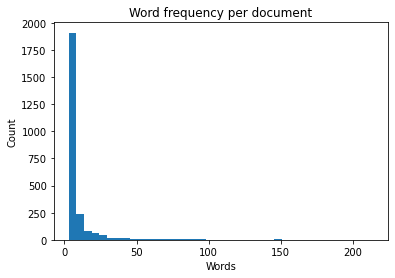

corpus [['lonely', 'good', 'good', 'leave', 'improve', 'feel', 'cause', 'mean', 'lonely', 'forever', 'flat', 'midnight', 'cry', 'bed', 'sleep', 'lonely', 'till', 'mind', 'deal', 'heartbreak', 'lonely', 'well', 'lonely', 'want', 'rid', 'sorry', 'win', 'person', 'fall', 'long', 'lonely', 'forever', 'flat', 'midnight', 'cry', 'bed', 'sleep', 'lonely', 'till', 'mind', 'deal', 'heartbreak', 'lonely', 'undeniable', 'lonely', 'lonely', 'lonely', 'lonely'], ['lie', 'sure', 'painful', 'watch', 'life', 'change', 'far', 'go', 'excite', 'guess', 'blame', 'ask', 'lie', 'lie', 'tonight', 'bring', 'summer', 'heart', 'lie', 'lie', 'night', 'feel', 'run', 'time', 'lie', 'lie', 'lie', 'lie', 'lie', 'god', 'change', 'mind', 'million', 'time', 'blind', 'excite', 'guess', 'blame', 'ask', 'unholy', 'sam', 'smith', 'kim', 'genius', 'savage', 'lie', 'lie', 'tonight', 'bring', 'summer', 'heart', 'lie', 'lie', 'night', 'feel', 'run', 'time', 'lie', 'lie', 'lie', 'lie', 'lie', 'lie', 'lie', 'lie', 'tonight', 'br

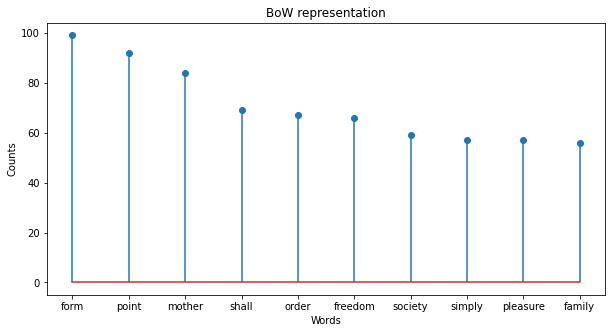

Topic: 0 
Words: 0.012*"come" + 0.011*"time" + 0.010*"feel" + 0.009*"go" + 0.009*"day" + 0.008*"say" + 0.008*"little" + 0.008*"think" + 0.007*"life" + 0.007*"tell" + 0.007*"find" + 0.007*"way" + 0.007*"good" + 0.007*"man" + 0.006*"get" + 0.006*"leave" + 0.006*"let" + 0.006*"long" + 0.005*"look" + 0.005*"cause"


In [ ]:
revive_lda_model, bow_revive = extract_topic(pd.read_csv("revive_df.csv"), 1)

### **8. Disconnect mood**

We will remove 52 songs because they are not in English
These are the most common words in the quotes:  [('get', 450), ('di', 422), ('come', 390), ('man', 323), ('let', 298), ('baby', 294), ('tell', 285), ('right', 272), ('cause', 268), ('want', 258), ('time', 231), ('way', 223), ('good', 217), ('girl', 212), ('work', 210), ('feel', 200), ('boom', 194), ('dance', 184), ('boy', 174), ('night', 161)]
The dictionary contains 4388 terms
First terms in the dictionary:
0 : air
1 : area
2 : attack
3 : away
4 : billy
5 : bird
6 : boss
7 : breast
8 : breeze
9 : bubble
10 : bye
11 : caress
12 : coconut
13 : collie
14 : come
15 : cool
16 : craven
17 : day
18 : di
19 : dress


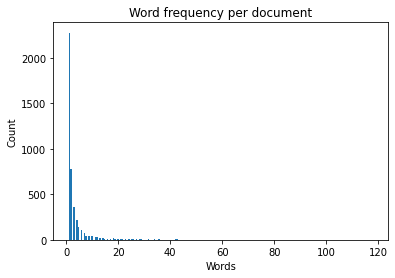

The dictionary contains 1332 terms
First terms in the dictionary:
0 : air
1 : area
2 : attack
3 : away
4 : billy
5 : bird
6 : boss
7 : breeze
8 : bubble
9 : come


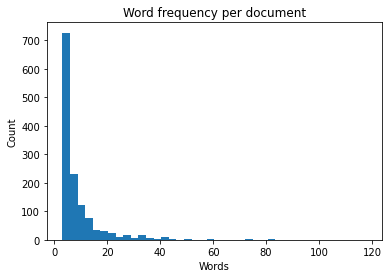

corpus [['k', 'day', 'come', 'man', 'musical', 'shack', 'attack', 'sing', 'come', 'turn', 'di', 'water', 'coconut', 'di', 'lollipop', 'di', 'high', 'di', 'mountain', 'di', 'cool', 'di', 'breeze', 'di', 'di', 'fishy', 'di', 'squeeze', 'smell', 'night', 'rice', 'di', 'sun', 'come', 'di', 'earth', 'hot', 'di', 'gal', 'fishy', 'smell', 'olden', 'rat', 'money', 'bubble', 'soup', 'pot', 'breast', 'wear', 'long', 'dress', 'leg', 'bird', 'nest', 'leg', 'bird', 'nest', 'di', 'good', 'mash', 'di', 'east', 'mash', 'di', 'west', 'dress', 'caress', 'day', 'di', 'evil', 'away', 'day', 'di', 'evil', 'away', 'ya', 'billy', 'wah', 'ya', 'boss', 'hear', 'right', 'away', 'craven', 'craven', 'day', 'di', 'evil', 'away', 'day', 'di', 'evil', 'away', 'young', 'sweet', 'plum', 'young', 'sweet', 'plum', 'thing', 'qualify', 'tell', 'lie', 'guy', 'girl', 'win', 'satisfy', 'girl', 'win', 'satisfy', 'hear', 'tell', 'bye', 'bye', 'hear', 'tell', 'bye', 'bye', 'billy', 'mad', 'natty', 'fi', 'opportunity', 'natty', 

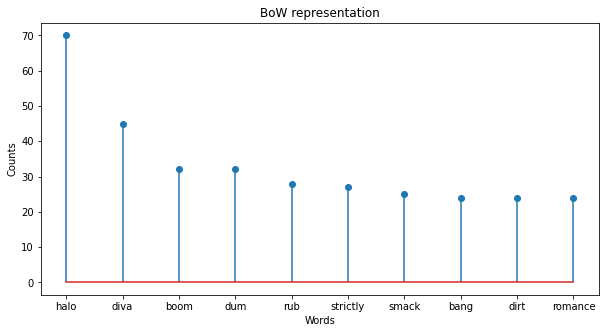

Topic: 0 
Words: 0.015*"get" + 0.014*"di" + 0.013*"come" + 0.011*"man" + 0.010*"let" + 0.010*"baby" + 0.010*"tell" + 0.009*"right" + 0.009*"cause" + 0.009*"want" + 0.008*"time" + 0.007*"way" + 0.007*"good" + 0.007*"girl" + 0.007*"work" + 0.007*"feel" + 0.007*"boom" + 0.006*"dance" + 0.006*"boy" + 0.005*"think"


In [ ]:
disconnect_lda_model, bow_disconnect = extract_topic(pd.read_csv("disconnect_df.csv"), 1)

### **Plot of relevant words per mood**


{'cause': 0.0160929, 'let': 0.013953953, 'time': 0.013546556, 'tell': 0.0124770785, 'think': 0.011356693, 'baby': 0.010185374, 'leave': 0.010134447, 'want': 0.0100325905, 'good': 0.00926869, 'heart': 0.009217759, 'day': 0.009014053, 'get': 0.008555711, 'feel': 0.008555708, 'k': 0.00819923, 'night': 0.008199229, 'come': 0.008097369, 'way': 0.007689958, 'say': 0.0069769826, 'fall': 0.0069769826, 'need': 0.0068751243}
{'get': 0.013887972, 'time': 0.01322506, 'let': 0.010407689, 'come': 0.009744782, 'say': 0.009446472, 'way': 0.009148157, 'go': 0.008949287, 'feel': 0.008750416, 'man': 0.008319522, 'cause': 0.007391448, 'need': 0.0072257225, 'good': 0.007026848, 'tell': 0.0068279733, 'want': 0.006761682, 'day': 0.006695394, 'leave': 0.0060656313, 'find': 0.0060324823, 'think': 0.0059993374, 'night': 0.005866753, 'people': 0.005601591}
{'baby': 0.020089699, 'get': 0.01760948, 'let': 0.015583997, 'feel': 0.012938434, 'want': 0.012504401, 'cause': 0.012421708, 'come': 0.012194381, 'night': 0.0

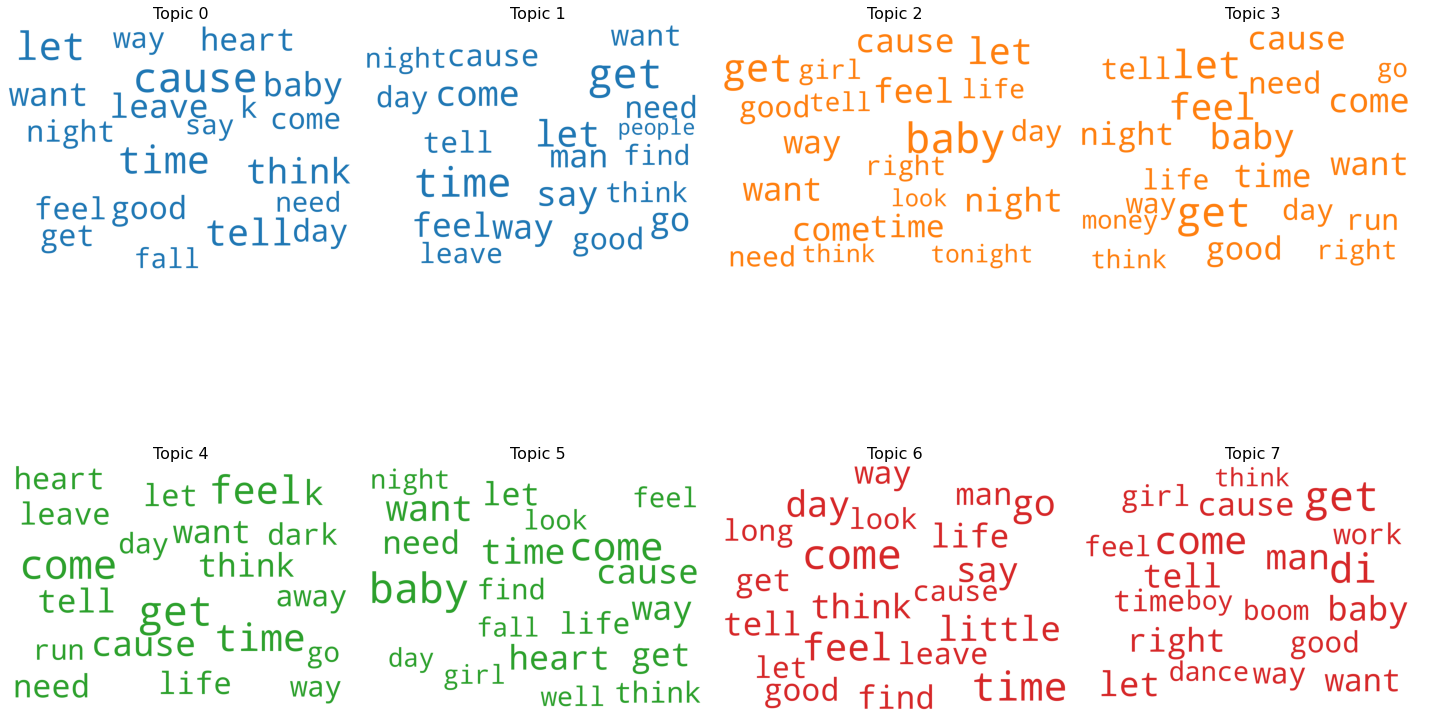

In [ ]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] 
cols = np.repeat(cols, 2)

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topic_models = [sad_lda_model, chill_lda_model, happy_lda_model, sport_lda_model,
                dark_lda_model, romance_lda_model, revive_lda_model, disconnect_lda_model]

fig, axes = plt.subplots(2, 4, figsize=(20,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    topics = topic_models[i].show_topics(num_topics=-1,formatted=False,num_words=20) 
    fig.add_subplot(ax)
    topic_words = dict(dict(topics)[0])
    print(topic_words)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
print("")
print("")

## **Recommender system: 1 Topic model with 8 topics**

This last section of the notebook tries to implement a recommender system, based on the distance of songs with respect to their proportion of the 8 different topics in their lyrics. The difference regarding the rest of the sections, is that in this case we work with all the songs together, regardless of the associated mood.

In [ ]:
# Read all the mood datasets
sad_df = pd.read_csv('sad_df.csv')
chill_df = pd.read_csv('chill_df.csv')
dark_df = pd.read_csv('dark_df.csv')
sport_df = pd.read_csv('sport_df.csv')
romance_df = pd.read_csv('romance_df.csv')
happy_df = pd.read_csv('happy_df.csv', sep=";")
revive_df = pd.read_csv('revive_df.csv')
disconnect_df = pd.read_csv('disconnect_df.csv')
happy_df.drop(happy_df.columns[22:], axis=1, inplace=True)

# Concatenate all the datasets into one
df_all = pd.concat([sad_df, chill_df, dark_df, sport_df, romance_df, happy_df, revive_df, disconnect_df])
df_all.reset_index(inplace=True)

We will remove 998 songs because they are not in English
These are the most common words in the quotes:  [('get', 3733), ('come', 3591), ('time', 3372), ('let', 3129), ('feel', 3123), ('baby', 2923), ('cause', 2782), ('want', 2541), ('way', 2510), ('tell', 2457), ('day', 2386), ('good', 2335), ('think', 2224), ('night', 2224), ('go', 2158), ('life', 2085), ('need', 1966), ('man', 1952), ('say', 1876), ('right', 1704)]
The dictionary contains 13545 terms
First terms in the dictionary:
0 : accomplice
1 : alibi
2 : baby
3 : bad
4 : bittersweet
5 : bloody
6 : break
7 : bury
8 : cause
9 : crime
10 : cross
11 : damage
12 : doe
13 : eyed
14 : face
15 : favorite
16 : flee
17 : hate
18 : heart
19 : honey


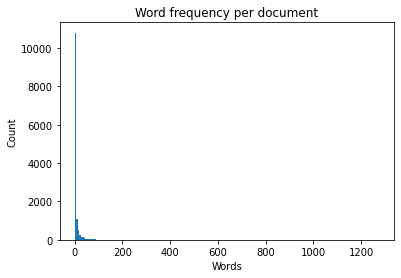

The dictionary contains 5000 terms
First terms in the dictionary:
0 : accomplice
1 : alibi
2 : baby
3 : bad
4 : bittersweet
5 : bloody
6 : break
7 : bury
8 : cause
9 : crime


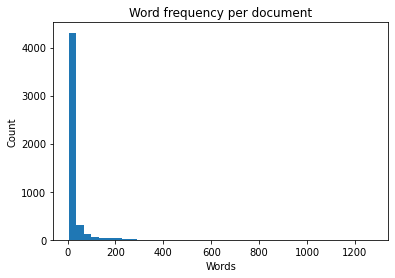

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[('bum', 80), ('halo', 70), ('freedom', 66), ('society', 59), ('pleasure', 57), ('aunt', 47), ('drawing', 46), ('interest', 46), ('appear', 45), ('diva', 45)]


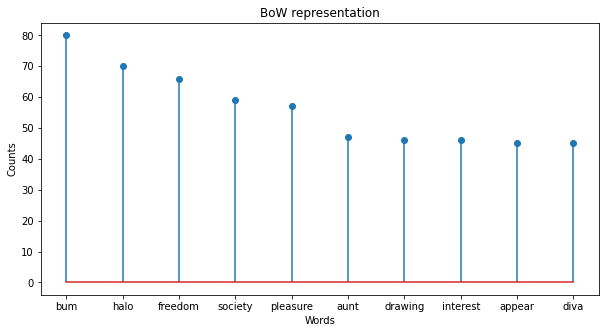

Topic: 0 
Words: 0.010*"come" + 0.009*"go" + 0.009*"say" + 0.008*"time" + 0.008*"day" + 0.007*"man" + 0.007*"see" + 0.007*"think" + 0.007*"tell" + 0.006*"saint" + 0.006*"feel" + 0.006*"little" + 0.006*"long" + 0.006*"people" + 0.005*"loup" + 0.005*"find" + 0.005*"good" + 0.005*"room" + 0.005*"moment" + 0.005*"give"
Topic: 1 
Words: 0.022*"baby" + 0.021*"let" + 0.017*"get" + 0.017*"feel" + 0.017*"cause" + 0.017*"night" + 0.014*"come" + 0.014*"time" + 0.012*"want" + 0.010*"way" + 0.010*"good" + 0.009*"need" + 0.009*"tonight" + 0.009*"think" + 0.009*"away" + 0.009*"k" + 0.009*"dance" + 0.009*"heart" + 0.008*"girl" + 0.008*"leave"
Topic: 2 
Words: 0.016*"little" + 0.015*"tell" + 0.014*"run" + 0.014*"work" + 0.013*"ah" + 0.012*"come" + 0.012*"get" + 0.011*"man" + 0.011*"want" + 0.010*"way" + 0.009*"di" + 0.009*"thing" + 0.008*"boy" + 0.008*"find" + 0.007*"day" + 0.007*"bout" + 0.007*"bit" + 0.007*"time" + 0.007*"eh" + 0.007*"cause"
Topic: 3 
Words: 0.014*"get" + 0.013*"right" + 0.012*"di" +

In [ ]:
# Create the topic model with 8 different topics
all_lda_model, corpus_bow = extract_topic(df_all, 4)

### **Most relevant words per topic using wordclouds**

Once the model is built, we extract some information about the songs and their relationships. In this case we extract the key words associated to each of the 8 topics of the model.

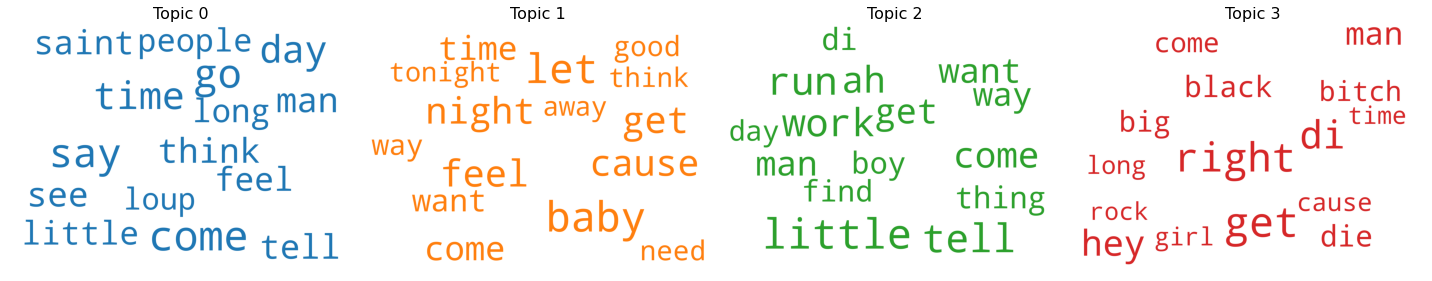

In [ ]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = all_lda_model.show_topics(formatted=False,num_words=15)

fig, axes = plt.subplots(1, 4, figsize=(20,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### **Most relevant words per topic using bar charts**

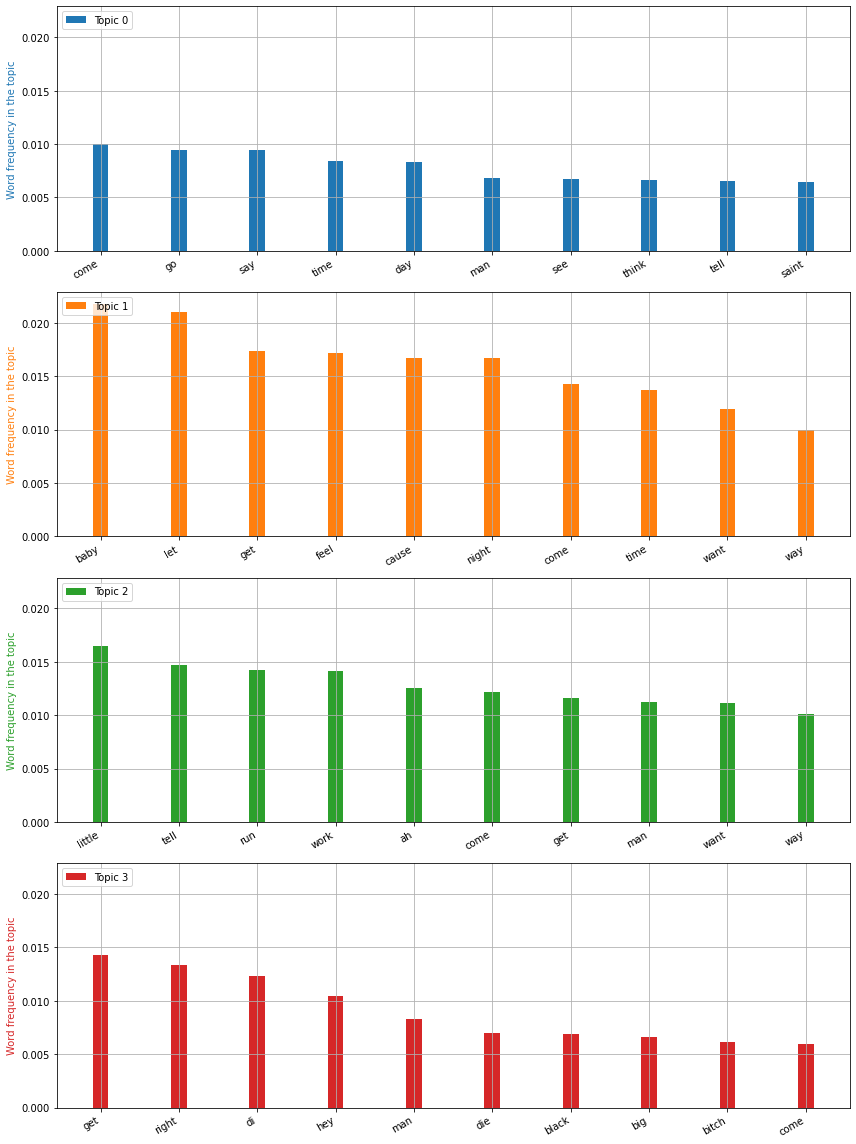

In [ ]:
import warnings   # I get some matplotlib warnings 
warnings.filterwarnings('ignore')

from collections import Counter
topics = all_lda_model.show_topics(formatted=False)
data_flat = [w for w_list in corpus_bow for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(4, 1, figsize=(12,16), sharey=True)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    
    ax.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Topic '+str(i))
    ax.set_ylabel('Word frequency in the topic', color=cols[i])
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right',)
    ax.legend(loc='upper left'); 
    ax.grid()
    
fig.tight_layout(w_pad=2)    
plt.show()

### **Most dominant topic per mood**

This section tries to obtain the the topic that is more present in each of the songs.

In [ ]:
#df_all = df_all.drop(['Unnamed: 0', 'Unnamed: 0.1'])

In [ ]:
idx_song=50

all_lda_model[corpus_bow[idx_song]]

[(0, 0.078780875), (1, 0.81339747), (2, 0.104731284)]

In [ ]:
# Let's convert the ratio of topics per song into a matrix
topics_song = all_lda_model[corpus_bow]
corpus_LDA_dense = corpus2dense(topics_song, num_terms=8, num_docs=len(topics_song)).T

In [ ]:
# Extract the information of the dominant topic per song

def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    
    # Add original text to the end of the output
    sent_topics_df = pd.concat([sent_topics_df, texts.reset_index(drop=True)],axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=all_lda_model, corpus=corpus_bow, texts=df_all['Lyrics'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             1.0              0.6169   
1            1             1.0              0.8986   
2            2             1.0              0.8436   
3            3             1.0              0.5524   
4            4             1.0              0.8528   
5            5             1.0              0.7095   
6            6             1.0              0.8816   
7            7             1.0              0.9920   
8            8             1.0              0.7864   
9            9             1.0              0.5366   

                                            Keywords  \
0  baby, let, get, feel, cause, night, come, time...   
1  baby, let, get, feel, cause, night, come, time...   
2  baby, let, get, feel, cause, night, come, time...   
3  baby, let, get, feel, cause, night, come, time...   
4  baby, let, get, feel, cause, night, come, time...   
5  baby, let, get, feel, cause, night, come, time...   
6  baby, let, get, feel, cause, night, come, time...   
7  baby, let, get, feel, cause, night, come, time...   
8  baby, let, get, feel, cause, night, come, time...   
9  baby, let, get, feel, cause, night, come, time...   

                                                Text  
0  . K favorite crime Know that I you so bad I le...  
1  . K Love in the Dark Take your off of me so I ...  
2  . K Crying in the Rain I can tell you been cry...  
3  . K go - - Tried calling yesterday but got you...  
4  . K Will It Ever Feel The Same ? I delete your...  
5  . K HEARTBREAK ANNIVERSARY are Guess they look...  
6  K Let Somebody Go We had a kind of love I thou...  
7  . K Train Wreck Laying in the silence Waiting ...  
8  . K Hurtless I remember the day that we met Yo...  
9  . K I got a heart and I got a soul Believe me ...

In [ ]:
sad_songs_idx = df_all.index[df_all['mood']=='sad'].tolist()
topics_sad = df_dominant_topic['Dominant_Topic'].iloc[sad_songs_idx]
topics_sad.value_counts(normalize=True)*100

1.0    79.487179
3.0    13.675214
0.0     3.846154
2.0     2.991453
Name: Dominant_Topic, dtype: float64

In [ ]:
chill_songs_idx = df_all.index[df_all['mood']=='chill'].tolist()
topics_chill = df_dominant_topic['Dominant_Topic'].iloc[chill_songs_idx]
topics_chill.value_counts(normalize=True)*100

1.0    60.227273
3.0    21.590909
2.0    10.227273
0.0     7.954545
Name: Dominant_Topic, dtype: float64

In [ ]:
happy_songs_idx = df_all.index[df_all['mood']=='happy'].tolist()
topics_happy = df_dominant_topic['Dominant_Topic'].iloc[happy_songs_idx]
topics_happy.value_counts(normalize=True)*100

In [ ]:
dark_songs_idx = df_all.index[df_all['mood']=='dark'].tolist()
topics_dark = df_dominant_topic['Dominant_Topic'].iloc[dark_songs_idx]
topics_dark.value_counts(normalize=True)*100

1.0    64.819277
3.0    17.108434
2.0    11.325301
0.0     6.746988
Name: Dominant_Topic, dtype: float64

In [ ]:
sport_songs_idx = df_all.index[df_all['mood']=='sport'].tolist()
topics_sport = df_dominant_topic['Dominant_Topic'].iloc[sport_songs_idx]
topics_sport.value_counts(normalize=True)*100

1.0    73.401535
3.0    12.787724
2.0    10.485934
0.0     3.324808
Name: Dominant_Topic, dtype: float64

In [ ]:
romance_songs_idx = df_all.index[df_all['mood']=='romance'].tolist()
topics_romance = df_dominant_topic['Dominant_Topic'].iloc[romance_songs_idx]
topics_romance.value_counts(normalize=True)*100

1.0    69.767442
3.0    15.116279
2.0    13.372093
0.0     1.744186
Name: Dominant_Topic, dtype: float64

### **Extracting proportion of topics of a song**

This section extracts the percentage of each of the 8 topics in a song.

In [ ]:
# In this case we will study song number 20
idx = 20 
song = df_all['song_name'].iloc[idx]
for index, score in all_lda_model[corpus_bow[idx]]:
    print("\nScore: %f\t \n Topic: %r" %(score, all_lda_model.print_topic(index, 20)))


Score: 0.151860	 
 Topic: '0.010*"come" + 0.009*"go" + 0.009*"say" + 0.008*"time" + 0.008*"day" + 0.007*"man" + 0.007*"see" + 0.007*"think" + 0.007*"tell" + 0.006*"saint" + 0.006*"feel" + 0.006*"little" + 0.006*"long" + 0.006*"people" + 0.005*"loup" + 0.005*"find" + 0.005*"good" + 0.005*"room" + 0.005*"moment" + 0.005*"give"'

Score: 0.841960	 
 Topic: '0.022*"baby" + 0.021*"let" + 0.017*"get" + 0.017*"feel" + 0.017*"cause" + 0.017*"night" + 0.014*"come" + 0.014*"time" + 0.012*"want" + 0.010*"way" + 0.010*"good" + 0.009*"need" + 0.009*"tonight" + 0.009*"think" + 0.009*"away" + 0.009*"k" + 0.009*"dance" + 0.009*"heart" + 0.008*"girl" + 0.008*"leave"'


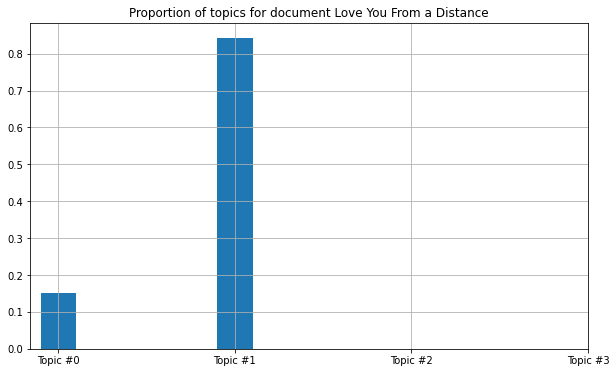

In [ ]:

plt.figure(figsize=(10,6))
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
plt.bar([s[0] for s in all_lda_model[corpus_bow[idx]]],[s[1] for s in all_lda_model[corpus_bow[idx]]],color=cols[0], width=0.2)
plt.grid()
plt.xticks(ticks=range(4),labels=['Topic #'+str(k) for k in range(4)])
plt.title(f'Proportion of topics for document {song}')
plt.show()

### **Recommender system: Extracting most similar songs of a given one: Hellinger distance**

This section is dedicated to the recommender system. Given a song, it computes the 10 closest songs with respect to their distribution of the 8 different topics. Note that since LDA is a probabilistic model, in order to compute distance between songs it is more suitable to use Hellinger distance (probabilistic version of the Euclidean distance).

In [ ]:
# index of the song to be used :
id_song = 50
distancias = np.array([hellinger(corpus_LDA_dense[id_song,:], corpus_LDA_dense[d,:]) for d in range(len(topics_song)) if d != id_song]) # HELLINGER: probabilistis version for euclidean distance

songs_sorted = np.argsort(distancias)
print("Mood of the original song: {}".format(df_all['mood'].iloc[id_song]))
print(f"The 10 nearest neighbors of the song {df_all['song_name'].iloc[id_song]} are:\n")

for i in range(10):
    
    song_name = df_all['song_name'].iloc[songs_sorted[i]]
    mood = df_all['mood'].iloc[songs_sorted[i]]
    print(f" Neighbor #{i}: {song_name}")
    print("Whose mood is: {}".format(mood))
    print('-'*20)

Mood of the original song: sad
The 10 nearest neighbors of the song Bruises are:

 Neighbor #0: Champion
Whose mood is: dark
--------------------
 Neighbor #1: Hayloft
Whose mood is: dark
--------------------
 Neighbor #2: Good Stuff
Whose mood is: sad
--------------------
 Neighbor #3: Demons - Massane Remix
Whose mood is: chill
--------------------
 Neighbor #4: Happier
Whose mood is: sad
--------------------
 Neighbor #5: Until the Levee
Whose mood is: dark
--------------------
 Neighbor #6: I Of The Storm
Whose mood is: dark
--------------------
 Neighbor #7: Damn (You’ve Got Me Saying)
Whose mood is: happy
--------------------
 Neighbor #8: Closer
Whose mood is: revive
--------------------
 Neighbor #9: Down In Atlanta
Whose mood is: happy
--------------------
